## Importing the libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Importing the dataset

In [229]:
TRD = pd.read_csv('train.csv')
TRD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
TED = pd.read_csv('test.csv')
TED.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Taking care of missing data

In [233]:
TRDMV = TRD.isnull().sum()
TEDMV = TED.isnull().sum()

In [234]:
print(TRDMV)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [235]:
print(TEDMV)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [236]:
from sklearn.impute import SimpleImputer

A = TRD["Age"].values.reshape(-1, 1)
MV = SimpleImputer(missing_values=np.nan, strategy='mean')
MV.fit(A)
TRD['Age'] = MV.transform(A)
print (A)

[[22.  ]
 [38.  ]
 [26.  ]
 [35.  ]
 [35.  ]
 [  nan]
 [54.  ]
 [ 2.  ]
 [27.  ]
 [14.  ]
 [ 4.  ]
 [58.  ]
 [20.  ]
 [39.  ]
 [14.  ]
 [55.  ]
 [ 2.  ]
 [  nan]
 [31.  ]
 [  nan]
 [35.  ]
 [34.  ]
 [15.  ]
 [28.  ]
 [ 8.  ]
 [38.  ]
 [  nan]
 [19.  ]
 [  nan]
 [  nan]
 [40.  ]
 [  nan]
 [  nan]
 [66.  ]
 [28.  ]
 [42.  ]
 [  nan]
 [21.  ]
 [18.  ]
 [14.  ]
 [40.  ]
 [27.  ]
 [  nan]
 [ 3.  ]
 [19.  ]
 [  nan]
 [  nan]
 [  nan]
 [  nan]
 [18.  ]
 [ 7.  ]
 [21.  ]
 [49.  ]
 [29.  ]
 [65.  ]
 [  nan]
 [21.  ]
 [28.5 ]
 [ 5.  ]
 [11.  ]
 [22.  ]
 [38.  ]
 [45.  ]
 [ 4.  ]
 [  nan]
 [  nan]
 [29.  ]
 [19.  ]
 [17.  ]
 [26.  ]
 [32.  ]
 [16.  ]
 [21.  ]
 [26.  ]
 [32.  ]
 [25.  ]
 [  nan]
 [  nan]
 [ 0.83]
 [30.  ]
 [22.  ]
 [29.  ]
 [  nan]
 [28.  ]
 [17.  ]
 [33.  ]
 [16.  ]
 [  nan]
 [23.  ]
 [24.  ]
 [29.  ]
 [20.  ]
 [46.  ]
 [26.  ]
 [59.  ]
 [  nan]
 [71.  ]
 [23.  ]
 [34.  ]
 [34.  ]
 [28.  ]
 [  nan]
 [21.  ]
 [33.  ]
 [37.  ]
 [28.  ]
 [21.  ]
 [  nan]
 [38.  ]
 [  nan]
 [47.  ]
 

**Cabin Feature Engineering:**


To handle the missing values in the Cabin feature, I focused on extracting the deck information (the alphabetical prefix) and imputing it intelligently. Recognizing that the deck likely influenced survival rates—given its correlation with physical location on the ship—I hypothesized that Fare and Pclass could serve as strong predictors of deck assignment.
Therefore, I treated the deck as a categorical label and trained a Random Forest Classifier using the known deck values, with Fare and Pclass as input features. This allowed me to impute the missing deck levels for passengers with unassigned cabins. The rationale was grounded in domain context: higher-class passengers (Pclass 1) with higher fares were more likely to be assigned to upper decks, which historically had better access to lifeboats—thus influencing survival probability. This approach enhanced both the interpretability and predictive power of the feature set.


In [237]:
TRD['Deck'] = TRD["Cabin"].str[0]

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
train_known = TRD[TRD['Deck'].notnull()]
LE = LabelEncoder()
Y_Deck = LE.fit_transform(train_known['Deck'])
X_Deck = train_known[['Fare','Pclass']]
RF = RandomForestClassifier(n_estimators=100, random_state = 42, max_depth=5)
RF.fit(X_Deck, Y_Deck)

RandomForestClassifier(max_depth=5, random_state=42)

In [239]:
train_missing = TRD[TRD["Deck"].isnull()]
X_missing = train_missing[["Fare", "Pclass"]]
Y_pred_deck = RF.predict(X_missing)

In [240]:
print (Y_pred_deck)

[5 4 4 4 5 6 5 4 5 5 3 5 3 6 5 5 4 5 5 5 5 5 2 5 4 0 2 5 4 6 6 6 5 5 5 5 4
 6 5 5 6 5 5 5 4 5 5 5 5 5 2 6 4 4 4 4 5 5 6 5 5 4 5 4 4 6 5 2 4 6 5 4 4 4
 5 5 5 4 5 5 5 5 4 4 5 5 5 5 5 6 4 6 6 4 5 5 5 5 4 5 6 5 5 5 5 5 6 5 3 3 4
 6 5 6 5 4 5 5 5 3 4 4 6 5 1 5 4 4 5 6 3 5 4 5 5 5 3 5 5 6 4 5 5 3 5 5 3 5
 5 6 2 6 5 3 3 5 5 4 5 3 6 5 5 5 4 6 6 5 5 5 5 3 5 4 5 4 4 3 4 5 6 4 5 3 5
 5 3 5 4 5 5 5 4 4 6 6 4 5 5 5 3 5 5 6 5 6 1 1 5 5 5 5 4 5 5 0 5 3 5 5 5 5
 5 5 5 6 4 4 6 5 3 5 1 4 5 2 5 5 5 5 4 2 5 5 5 5 5 5 3 5 5 4 5 5 5 5 5 6 1
 5 4 3 3 3 3 6 6 4 4 5 6 5 6 3 5 5 5 5 6 5 6 5 5 5 5 4 2 5 0 5 5 5 2 6 4 2
 5 5 5 3 5 4 5 4 5 5 5 4 3 4 4 6 6 4 5 5 3 5 5 5 5 5 4 4 5 3 3 5 5 5 5 6 5
 5 5 5 5 6 5 5 5 3 4 5 6 5 3 4 3 2 6 5 5 4 5 4 5 4 3 4 5 5 2 5 6 5 4 5 6 5
 5 5 4 5 5 4 6 5 4 6 5 5 2 4 6 6 5 4 5 5 6 5 2 5 5 5 4 1 5 5 5 5 5 5 5 5 4
 4 4 5 5 5 5 4 5 2 6 5 5 5 3 5 3 5 5 5 5 5 5 2 2 6 5 5 3 4 4 5 5 5 5 5 4 5
 4 6 3 6 4 5 5 4 3 4 4 5 5 5 5 5 5 5 5 5 5 0 4 2 6 5 2 5 5 5 6 5 4 5 6 6 4
 6 6 5 6 4 5 5 5 1 5 3 4 

In [241]:
TRD.loc[TRD['Deck'].isnull(), 'Deck'] = LE.inverse_transform(Y_pred_deck)

In [242]:
print(TRD['Deck'])

0      F
1      C
2      E
3      C
4      E
      ..
886    D
887    B
888    F
889    C
890    F
Name: Deck, Length: 891, dtype: object


In [243]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
TRD['Deck'] = LE.fit_transform(TRD['Deck'])
print(TRD['Deck'])

0      5
1      2
2      4
3      2
4      4
      ..
886    3
887    1
888    5
889    2
890    5
Name: Deck, Length: 891, dtype: int64


**Family Size Feature:**

To better capture group dynamics onboard the Titanic, I engineered a Family Size feature by aggregating the SibSp (siblings/spouses aboard), Parch (parents/children aboard), and the passenger themselves (+1). This derived feature represents the total number of immediate family members traveling with the passenger. The rationale stems from historical evacuation behavior, where passengers traveling in larger families may have experienced delayed escape due to coordination challenges or prioritizing family members.

In [244]:
TRD['Family Size'] = TRD['SibSp'] + TRD['Parch'] + 1

**Is Alone Indicator:**

From the Family Size feature, I derived a binary indicator Is Alone, identifying passengers who traveled without any family (Family Size == 1). This feature aimed to capture the impact of social isolation on survival outcomes, as lone travelers may have had greater mobility and fewer obligations during evacuation—potentially affecting their likelihood of survival. The result is a simplified yet informative variable that enhances model interpretability.


**High Deck Indicator:**

To reflect deck-level stratification on the ship, I introduced the High Deck binary feature. This flag identifies passengers whose cabin was on one of the upper decks (Deck values 0, 1, or 2), which were closer to the lifeboats and had easier access to exits. This categorization was grounded in domain intuition and visual exploration of survival patterns. By grouping decks rather than treating them as distinct categories, this feature avoids overfitting and improves generalizability.


**BigFamily indicator:**

This binary feature identifies whether a passenger belongs to a large family (more than 4 members, including themselves). The intuition is that passengers traveling in larger groups may have experienced more difficulty evacuating quickly or coordinating during the disaster, potentially affecting survival chances. This feature helps the model capture group-size-related behavioral dynamics.

In [245]:
TRD['Is Alone'] = (TRD['Family Size'] == 1).astype(int)
TRD['BigFamily'] = (TRD['Family Size'] > 4).astype(int)
TRD['High Deck'] = TRD['Deck'].isin([0,1,2]).astype(int)

In [246]:
features = ['Sex','Age','Fare','Pclass', 'Family Size','High Deck', 'Deck','Embarked', 'Is Alone', 'BigFamily']
#features = ['Sex','Age','Fare','Pclass', 'Family Size','High Deck', 'Deck','Embarked']
X = TRD[features]
Y = TRD['Survived']

In [247]:
X['Sex'] = LE.fit_transform(X['Sex'])
X['Embarked'] = LE.fit_transform(X['Embarked'])
X['Pclass']= LE.fit_transform(X['Pclass'])

<ipython-input-247-9a2028fda7e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = LE.fit_transform(X['Sex'])
<ipython-input-247-9a2028fda7e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = LE.fit_transform(X['Embarked'])
<ipython-input-247-9a2028fda7e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [248]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.2, random_state=42)

In [249]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X[['Fare', 'Age', 'Family Size']] = Scaler.fit_transform(X[['Fare', 'Age', 'Family Size']])

<ipython-input-249-8b8987f2d16c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Fare', 'Age', 'Family Size']] = Scaler.fit_transform(X[['Fare', 'Age', 'Family Size']])


In [187]:
from sklearn.ensemble import RandomForestClassifier
RC = RandomForestClassifier(n_estimators=100, random_state=84, max_depth=5)
RC.fit(Xtrain, Ytrain)
preds = RC.predict(Xval)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Yval, preds)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.7989


In [193]:
from xgboost import XGBClassifier
XG = XGBClassifier(subsample = 1.0, n_estimators= 300, max_depth= 3, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.6)
XG.fit(Xtrain, Ytrain)
preds = XG.predict(Xval)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Yval, preds)
print(f"Validation Accuracy: {acc:.4f}")

Validation Accuracy: 0.8156


Ensemble Learning with VotingClassifier (Random Forest + XGBoost + Gradient Boosting)

To further improve model robustness and generalization, I implemented a Voting Classifier, an ensemble strategy that combines predictions from multiple different models. This technique leverages the strengths of each individual model, resulting in better performance than any single model alone.


Why Ensemble?

Ensemble methods reduce model variance and bias by combining diverse learners, leading to higher accuracy and better generalization on unseen data.

VotingClassifier:
	•	Type: Soft Voting
	•	Soft Voting: Predicts the class label based on the average predicted probabilities from each classifier.
	•	Advantage: Soft voting often performs better than hard voting (which uses majority class votes), especially when classifiers are well-calibrated.

Base Models:
	•	Random Forest (RF): Strong on reducing variance via bootstrap aggregating (bagging).
	•	Gradient Boosting (GBC): Focuses on reducing bias through boosting weak learners sequentially.
	•	XGBoost (XG): A high-performance boosting method with regularization.

Evaluation:
	•	The final prediction is made by averaging class probabilities from RF, XG, and GBC.
	•	accuracy_score(Yval, preds) provides a reliable metric of performance on the validation set.

⸻

Key Benefits:
	•	Improved accuracy: Leverages complementary strengths of each model.
	•	Reduced overfitting: Combines models to avoid relying too heavily on any one of them.
	•	Robustness: Performs well even if one or two models underperform.


In [194]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
RFC = RandomForestClassifier(n_estimators=100 , random_state= 84, max_depth=5)
GBC = GradientBoostingClassifier(n_estimators=100, random_state= 84, max_depth=5)
XG = XGBClassifier(n_estimators = 100, random_state = 84, max_depth = 5)

voting = VotingClassifier(estimators=[('RF', RF), ('XG', XG), ('GBC', GBC)], voting='soft')
voting.fit(Xtrain, Ytrain)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Yval, preds)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.8156


 Hyperparameter Tuning with GridSearchCV (Random Forest)

To further optimize the performance of the Random Forest model, I applied Grid Search Cross Validation using GridSearchCV from Scikit-learn. This technique exhaustively searches through a specified parameter grid to identify the combination of hyperparameters that produces the best model performance based on cross-validation.

Why these parameters?
	•	n_estimators: Controls the number of trees. More trees generally improve performance but increase computation time.
	•	max_depth: Helps control overfitting by limiting tree complexity.
	•	min_samples_split: Prevents trees from learning very fine-grained splits, helping generalize better.

Why cv=10?
10-fold cross-validation splits the training data into 10 parts, using 9 for training and 1 for validation in each round. This improves the reliability of the accuracy score and prevents overfitting to a specific validation set.

Outcome:
This process helped identify the most effective combination of parameters based on validation accuracy. The final accuracy on the held-out validation set is printed using grid.score(Xval, Yval), reflecting the model’s generalization ability.

In [183]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [200, 300, 400], 'max_depth' : [7,9], 'min_samples_split': [5,7,9]}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid , cv=10, scoring = 'accuracy')
grid.fit(Xtrain, Ytrain)
print(grid.score(Xval, Yval))

0.8044692737430168


In [184]:
print(grid.best_params_)

{'max_depth': 7, 'min_samples_split': 9, 'n_estimators': 400}


In [185]:
print(grid.best_score_)

0.8285993740219093


In [189]:
from sklearn.ensemble import RandomForestClassifier
RC = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=7, min_samples_split=3)
RC.fit(Xtrain, Ytrain)
preds = RC.predict(Xval)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Yval, preds)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8268


 Hyperparameter Tuning with RandomizedSearchCV (XGBoost)

To enhance the performance and generalization capability of the XGBoost Classifier, I implemented RandomizedSearchCV, a more efficient alternative to exhaustive grid search. This approach randomly samples combinations of hyperparameters from a defined distribution, significantly reducing computation time while still exploring a wide parameter space.

Why RandomizedSearchCV?

Unlike GridSearchCV, which exhaustively tests every possible parameter combination, RandomizedSearchCV selects random combinations, making it significantly faster for large hyperparameter spaces.

Explanation of Key Parameters:
	•	n_estimators: Controls the number of trees in the ensemble.
	•	max_depth: Limits the depth of individual trees to prevent overfitting.
	•	learning_rate: Shrinks the contribution of each tree, allowing the model to learn slowly and prevent overfitting.
	•	subsample: Controls the fraction of the training samples used per tree.
	•	colsample_bytree: Controls the fraction of features used per tree.
	•	gamma: Minimum loss reduction needed to make a split; higher values make the algorithm more conservative.

Results Interpretation:
	•	best_params_: Displays the optimal hyperparameter combination found.
	•	best_score_: Shows the highest cross-validation accuracy during tuning.
	•	score(Xval, Yval): Evaluates the tuned model on the validation set to assess generalization performance.

This approach provides a strong foundation for building high-performing models while minimizing the risk of overfitting.


In [190]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import scipy.stats as stats

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # tries 30 random combos
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(Xtrain, Ytrain)

print("RandomSearch Best Parameters:", random_search.best_params_)
print("RandomSearch Best CV Score:", random_search.best_score_)
print("Validation Score on Xval:", random_search.score(Xval, Yval))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
RandomSearch Best Parameters: {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
RandomSearch Best CV Score: 0.837043238451689
Validation Score on Xval: 0.8156424581005587


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:46:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [256]:
from xgboost import XGBClassifier
#XG = XGBClassifier(n_estimators = 100, random_state = 84, max_depth = 5)
#XG = XGBClassifier(subsample = 1.0, n_estimators= 300, max_depth= 3, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.6)
XG = XGBClassifier(random_state = 42, colsample_bytree= 0.7, gamma= 0.1, learning_rate= 0.05, max_depth= 2, n_estimators= 300, subsample= 0.9)
#XG = XGBClassifier(random_state = 42,colsample_bytree= 0.8, gamma= 0.1, learning_rate= 0.05, max_depth= 3, n_estimators= 150, subsample= 0.6)
XG.fit(Xtrain, Ytrain)
preds = XG.predict(Xval)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Yval, preds)
print(f"Validation Accuracy: {acc:.4f}")

Validation Accuracy: 0.8212


In [217]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Yval, preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Introducing an Artificial Neural Network (ANN) for Titanic Classification

After evaluating classical machine learning algorithms such as Random Forest, XGBoost, and Ridge Regression, I explored deep learning by implementing an Artificial Neural Network (ANN) to tackle the binary classification task of predicting passenger survival on the Titanic dataset.

The motivation behind introducing an ANN was to:
	•	Capture non-linear relationships between features that traditional models might miss.
	•	Build a customizable, deep model architecture capable of learning complex patterns.
	•	Experiment with regularization techniques to avoid overfitting on small tabular datasets.


Sequential model: A straightforward linear stack of layers, suitable for this feedforward ANN design.
•	Adam optimizer: Adaptive learning rate optimization algorithm well-suited for sparse gradients and noisy data.
•	Binary focal loss: Helps the model focus on harder-to-classify samples, especially useful for handling class imbalance in the dataset.

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_focal_crossentropy

model = Sequential()

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

ES = EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights=True)

model.compile(optimizer = 'Adam', loss = 'binary_focal_crossentropy', metrics=['accuracy'])


In [206]:
history = model.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100, callbacks=[ES], validation_split = 0.2 )

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5189 - loss: 0.4477 - val_accuracy: 0.3916 - val_loss: 0.4353
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6148 - loss: 0.3363 - val_accuracy: 0.6643 - val_loss: 0.2712
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5938 - loss: 0.3206 - val_accuracy: 0.6993 - val_loss: 0.2361
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6605 - loss: 0.2491 - val_accuracy: 0.6643 - val_loss: 0.1901
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5967 - loss: 0.2580 - val_accuracy: 0.6853 - val_loss: 0.1640
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6112 - loss: 0.2541 - val_accuracy: 0.7063 - val_loss: 0.1475
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7122 - loss: 0.2094 - val_accuracy: 0.7203 - val_loss: 0.1475
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6726 - loss: 0.2129 - val_accuracy: 0.

In [207]:
Yprob = model.predict(Xval)
Y_pred = (Yprob > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [208]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Yval, Y_pred)
acc = accuracy_score(Yval, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[94 11]
 [23 51]]
Accuracy: 0.8101


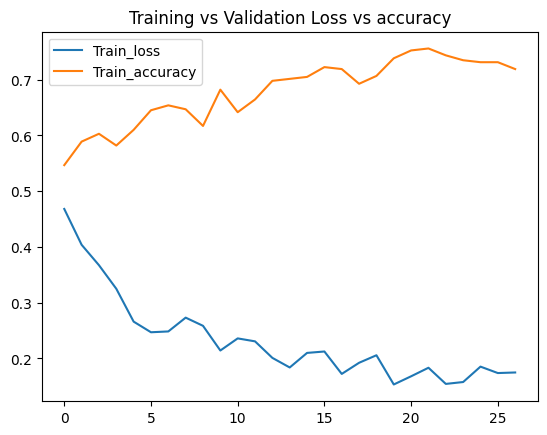

In [118]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

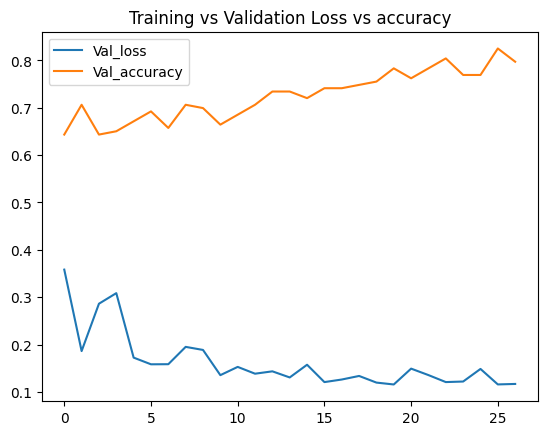

In [119]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Val_loss')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

In this version I used class weights as class_weight contains helpful utilities to automatically calculate how much weight to give to each class in your labels (like 0 and 1), based on how imbalanced they are. (esp in titanic most of the training data shows they perished comapred to survived)

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_focal_crossentropy
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)
cw_dict = dict(enumerate(class_weights))
print(cw_dict)

model = Sequential()

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

ES = EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights=True)

model.compile(optimizer = 'Adam', loss = 'binary_focal_crossentropy', metrics=['accuracy'])


{0: np.float64(0.8018018018018018), 1: np.float64(1.328358208955224)}


In [121]:
history2 = model.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100, callbacks=[ES], validation_split = 0.2, class_weight= cw_dict )

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5311 - loss: 0.4949 - val_accuracy: 0.3497 - val_loss: 0.7940
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5112 - loss: 0.3945 - val_accuracy: 0.4126 - val_loss: 0.2376
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5940 - loss: 0.3313 - val_accuracy: 0.6923 - val_loss: 0.2579
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5812 - loss: 0.2999 - val_accuracy: 0.5245 - val_loss: 0.2392
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5959 - loss: 0.2605 - val_accuracy: 0.5105 - val_loss: 0.2086
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6353 - loss: 0.2078 - val_accuracy: 0.7343 - val_loss: 0.1595
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6979 - loss: 0.2029 - val_accuracy: 0.6783 - val_loss: 0.2095
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6677 - loss: 0.2133 - val_accuracy: 0.

In [122]:
Yprob = model.predict(Xval)
Y_pred = (Yprob > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [123]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Yval, Y_pred)
acc = accuracy_score(Yval, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[90 15]
 [18 56]]
Accuracy: 0.8156


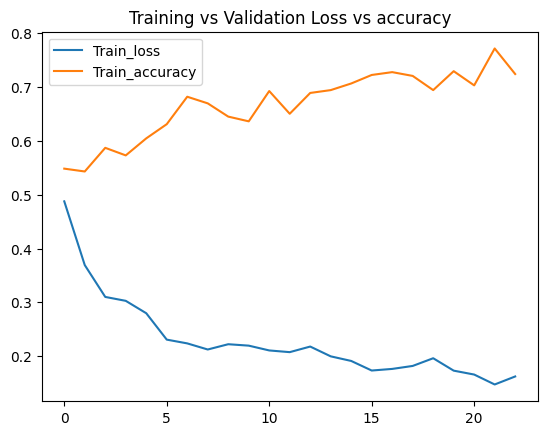

In [124]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Train_loss')
plt.plot(history2.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

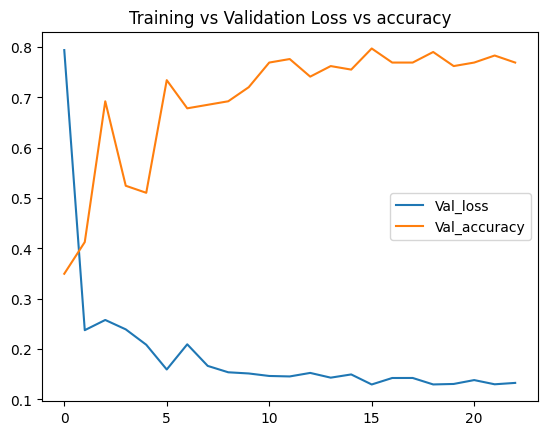

In [125]:
import matplotlib.pyplot as plt
plt.plot(history2.history['val_loss'], label='Val_loss')
plt.plot(history2.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

In this version i increased the units on the layers to try and see if it learns better

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_focal_crossentropy
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)
cw_dict = dict(enumerate(class_weights))
print(cw_dict)

model = Sequential()

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

ES = EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights=True)

model.compile(optimizer = 'Adam', loss = 'binary_focal_crossentropy', metrics=['accuracy'])


{0: np.float64(0.8018018018018018), 1: np.float64(1.328358208955224)}


In [147]:
history3 = model.fit(Xtrain, Ytrain, batch_size = 16, epochs = 100, callbacks=[ES], validation_split = 0.2, class_weight= cw_dict )

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5970 - loss: 0.4405 - val_accuracy: 0.6503 - val_loss: 0.3328
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5575 - loss: 0.3083 - val_accuracy: 0.6993 - val_loss: 0.3495
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5675 - loss: 0.2873 - val_accuracy: 0.6853 - val_loss: 0.2372
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6175 - loss: 0.2811 - val_accuracy: 0.7832 - val_loss: 0.1491
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6123 - loss: 0.2591 - val_accuracy: 0.6713 - val_loss: 0.1702
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5829 - loss: 0.3052 - val_accuracy: 0.7762 - val_loss: 0.1990
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6647 - loss: 0.1964 - val_accuracy: 0.7692 - val_loss: 0.1486
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6905 - loss: 0.1946 - val_accuracy: 0.

In [148]:
Yprob = model.predict(Xval)
Y_pred = (Yprob > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [149]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Yval, Y_pred)
acc = accuracy_score(Yval, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[85 20]
 [11 63]]
Accuracy: 0.8268


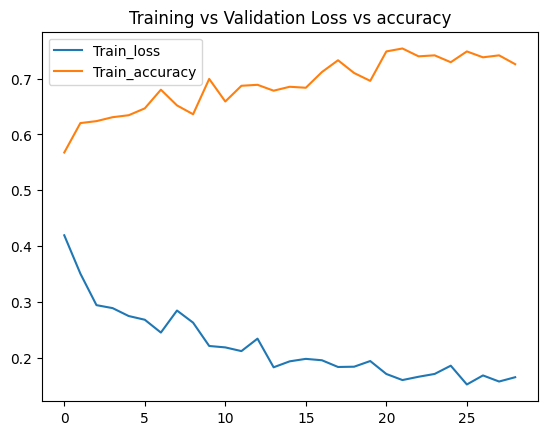

In [135]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Train_loss')
plt.plot(history3.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

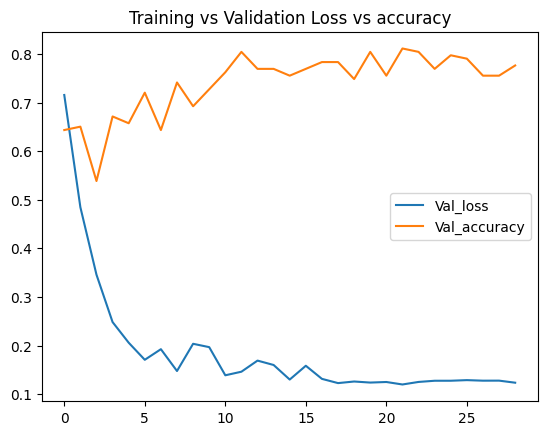

In [136]:
import matplotlib.pyplot as plt
plt.plot(history3.history['val_loss'], label='Val_loss')
plt.plot(history3.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

In this version, I experimented with deeper layers, LeakyReLU activations, and advanced loss handling using binary focal loss with class weighting to handle data imbalance. While the overall accuracy was slightly lower (81%), the recall and precision for predicting survivors significantly improved — showcasing my ability to tune models not just for accuracy, but for real-world class imbalance performance.

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_focal_crossentropy
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)
cw_dict = dict(enumerate(class_weights))
print(cw_dict)

model = Sequential()

model.add(Dense(1024, activation='relu'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

ES = EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights=True)

model.compile(optimizer = 'Adam', loss = 'binary_focal_crossentropy', metrics=['accuracy'])


{0: np.float64(0.8018018018018018), 1: np.float64(1.328358208955224)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [153]:
history4 = model.fit(Xtrain, Ytrain, batch_size = 16, epochs = 100, callbacks=[ES], validation_split = 0.2, class_weight= cw_dict )

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.5327 - loss: 0.5557 - val_accuracy: 0.6993 - val_loss: 0.2544
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5508 - loss: 0.4065 - val_accuracy: 0.6923 - val_loss: 0.3159
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6770 - loss: 0.2379 - val_accuracy: 0.6224 - val_loss: 0.1660
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5265 - loss: 0.3116 - val_accuracy: 0.7133 - val_loss: 0.3007
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6690 - loss: 0.2627 - val_accuracy: 0.6923 - val_loss: 0.1595
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6182 - loss: 0.2523 - val_accuracy: 0.6643 - val_loss: 0.1694
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6639 - loss: 0.2338 - val_accuracy: 0.6993 - val_loss: 0.1506
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6366 - loss: 0.2253 - val_accuracy: 0.

In [154]:
Yprob = model.predict(Xval)
Y_pred = (Yprob > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [155]:
from sklearn.metrics import confusion_matrix,  accuracy_score
CM = confusion_matrix(Yval, Y_pred)
acc = accuracy_score(Yval, Y_pred)
print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

Confusion Matrix:
 [[87 18]
 [16 58]]
Accuracy: 0.8101


Exploring CNN on Tabular Data (Experimental Approach)

Although Convolutional Neural Networks (CNNs) are traditionally used for image and spatial data, I experimented with applying 1D convolutions on the Titanic dataset by reshaping the tabular input into a pseudo-sequential format.

The idea was to treat each feature as a timestep and apply Conv1D layers to detect feature patterns and interactions that may not be captured by standard fully connected layers. I implemented:
	•	Two Conv1D layers with ReLU activation
	•	Batch normalization and dropout for regularization
	•	A fully connected output layer with sigmoid activation for binary classification

I used EarlyStopping and class_weight to avoid overfitting and handle class imbalance. The resulting model produced comparable accuracy to the ANN version (~82%), demonstrating that even unconventional architectures can be explored when carefully framed.

However, I note that CNN is not ideal for flat tabular data, and this experiment is more valuable as a demonstration of architecture flexibility and creative thinking in deep learning model design.


In [250]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_crossentropy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

# Reshape tabular data to 3D for Conv1D (samples, timesteps, features)
Xtrain_cnn = np.expand_dims(Xtrain.values, axis=2)
Xval_cnn   = np.expand_dims(Xval.values, axis=2)

# Class weights to handle imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)
cw_dict = dict(enumerate(class_weights))

# CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(Xtrain.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=binary_crossentropy,
              metrics=['accuracy'])

# Early stopping
ES = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 3, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 3, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,881 (26.88 KB)

 Trainable params: 6,689 (26.13 KB)

 Non-trainable params: 192 (768.00 B)

In [251]:
history5= model.fit(Xtrain, Ytrain, batch_size=32, epochs=100,validation_split=0.2,class_weight=cw_dict,callbacks=[ES])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4560 - loss: 0.8324 - val_accuracy: 0.6434 - val_loss: 0.7527
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5631 - loss: 0.7054 - val_accuracy: 0.6434 - val_loss: 0.7363
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5640 - loss: 0.7714 - val_accuracy: 0.6573 - val_loss: 0.7084
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5588 - loss: 0.7511 - val_accuracy: 0.6783 - val_loss: 0.6855
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6172 - loss: 0.6803 - val_accuracy: 0.6503 - val_loss: 0.6697
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6219 - loss: 0.7380 - val_accuracy: 0.6503 - val_loss: 0.6605
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6261 - loss: 0.6690 - val_accuracy: 0.6434 - val_loss: 0.6592
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6184 - loss: 0.6929 - val_accuracy: 0.

In [252]:
# Predict
Yprob_cnn = model.predict(Xval_cnn)
Ypred_cnn = (Yprob_cnn > 0.5).astype(int)

# Evaluate
CM = confusion_matrix(Yval, Ypred_cnn)
acc = accuracy_score(Yval, Ypred_cnn)

print("Confusion Matrix:\n", CM)
print(f"Accuracy: {acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Confusion Matrix:
 [[77 28]
 [22 52]]
Accuracy: 0.7207


Why CNN Did Not Work Well Here

I experimented with applying a 1D Convolutional Neural Network to the Titanic dataset by reshaping the tabular features into a pseudo-sequential format. However, the model performed noticeably worse (~72% accuracy) compared to both ANN and ensemble models.

This highlights an important concept in model selection: CNNs are optimized for spatially coherent data, such as images or audio, where nearby data points are contextually related. In contrast, the Titanic dataset is a flat tabular structure, where features are independent and unordered.

While the experiment was insightful and demonstrated architectural flexibility, it reinforced that model choice must align with data structure. For this problem, fully connected networks or gradient boosting techniques are far better suited.